<a href="https://colab.research.google.com/github/ellenguyen/CIS4496_EY/blob/main/AugmentDataTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### As a task, augment the following data:  



##### A few things:
- This is only two projects from RoboFlow. I went through about 5 and found these to be ones that were not yet augmented and the best labeled.
- In case you want to get more data, here is a reference what this dataset contains:
  - https://universe.roboflow.com/eyhackathon2024/master-apaav/dataset/2
  - https://universe.roboflow.com/sampaiathenstak/buildings-ditz1/dataset/14
- Everything from roboflow is in bounding box format (this here

```
# This is formatted as code
```

. I am using segmentation format which is slightly different. But fortunately, YOLO recognizes both.


In [ ]:
from google.colab import drive
import os
from pathlib import Path

# For Google Colab:
def mount_google_drive():
    drive_mount_path = '/content/drive'
    try:
        if not os.path.ismount(drive_mount_path):
            drive.mount(drive_mount_path)
            print("Google Drive mounted successfully.")
        else:
            print("Google Drive is already mounted.")
    except Exception as e:
        print(f"Failed to mount Google Drive: {e}")


def find_and_change_dir(target_dir, start_path='/'):
    # Try to find the target directory
    for root, dirs, files in os.walk(start_path):
        if target_dir in dirs:
            full_path = os.path.join(root, target_dir)
            print(f"Success: Found the directory at {full_path}")
            os.chdir(full_path)
            print(f"Success: Changed directory to {full_path}")
            return True
    print("Failure: Could not find the target directory.")
    return False

def create_path_to_folder(sub_folder):
    # Check if the sub-folder exists and create a path
    if os.path.exists(sub_folder):
        full_path = os.path.abspath(sub_folder)
        print(f"Success: Found the folder {sub_folder}. Full path is {full_path}")
        return full_path
    else:
        print(f"Failure: The folder {sub_folder} does not exist.")
        return None


# Mount the Drive
mount_google_drive()

# Start by finding and changing directory to CIS4496_EY
if find_and_change_dir('CIS4496_EY'):
    # If successful, create path to given/OtherTeamsData folder
    other_teams_data_path = create_path_to_folder('given/OtherTeamData')
    if other_teams_data_path:
        print(f"Ready for further actions in {other_teams_data_path}")
    else:
        print("Could not proceed to the next step.")
else:
    print("Please ensure the CIS4496_EY directory exists and is accessible from the mounted drive.")


Mounted at /content/drive
Google Drive mounted successfully.
Success: Found the directory at /content/drive/MyDrive/EYProject/CIS4496_EY
Success: Changed directory to /content/drive/MyDrive/EYProject/CIS4496_EY
Success: Found the folder given/OtherTeamData. Full path is /content/drive/MyDrive/EYProject/CIS4496_EY/given/OtherTeamData
Ready for further actions in /content/drive/MyDrive/EYProject/CIS4496_EY/given/OtherTeamData


In [ ]:
pip install albumentations

In [ ]:
import os
import cv2
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import albumentations as A
import matplotlib.pyplot as plt
from pathlib import Path

## **Agmentation for Box Annotation**

In [ ]:
# def convert_yolo_to_pascal_voc(x_center, y_center, width, height, img_width, img_height):
#     xmin = int((x_center - width / 2) * img_width)
#     xmax = int((x_center + width / 2) * img_width)
#     ymin = int((y_center - height / 2) * img_height)
#     ymax = int((y_center + height / 2) * img_height)
#     return [xmin, ymin, xmax, ymax]


# def define_augmentation_pipeline():
#     horizontal_flip = A.HorizontalFlip(p=1)
#     vertical_flip = A.VerticalFlip(p=0.5)
#     brightness_contrast = A.RandomBrightnessContrast()
#     blur = A.Blur(blur_limit=(2, 5))
#     hue_saturation_value = A.HueSaturationValue(p=0.5)
#     gaussian_noise = A.GaussNoise(var_limit=(10.0, 50.0), p=0.5)
#     rotation = A.Rotate(limit=20, p=0.5)

#     augmentation_pipeline = A.Compose([horizontal_flip, vertical_flip, brightness_contrast, blur, hue_saturation_value, gaussian_noise, rotation],
#                                       bbox_params=A.BboxParams(format='pascal_voc', label_fields=['class_labels']))
#     return augmentation_pipeline


# def save_augmented_results(aug_image, aug_bboxes, class_labels, img_width, img_height, aug_image_path):
#     cv2.imwrite(str(aug_image_path), cv2.cvtColor(aug_image, cv2.COLOR_RGB2BGR))
#     aug_annotation_path = aug_image_path.with_suffix('.txt')
#     with open(aug_annotation_path, 'w') as file:
#         for bbox, class_label in zip(aug_bboxes, class_labels):
#             x_center = ((bbox[0] + bbox[2]) / 2) / img_width
#             y_center = ((bbox[1] + bbox[3]) / 2) / img_height
#             bbox_width = (bbox[2] - bbox[0]) / img_width
#             bbox_height = (bbox[3] - bbox[1]) / img_height
#             file.write(f"{class_label} {x_center} {y_center} {bbox_width} {bbox_height}\n")


# def process_images(image_dir, annotation_dir, output_dir):
#     transform = define_augmentation_pipeline()
#     image_dir = Path(image_dir)
#     annotation_dir = Path(annotation_dir)
#     output_dir = Path(output_dir)
#     output_dir.mkdir(exist_ok=True)

#     for filename in image_dir.glob('*.jpg'):
#         annotation_path = annotation_dir / filename.with_suffix('.txt').name
#         if not annotation_path.exists():
#             print(f"Annotation file does not exist for {filename.name}")
#             continue

#         image = cv2.imread(str(filename))
#         image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#         height, width = image.shape[:2]

#         bboxes, class_labels = load_and_convert_annotations(annotation_path, width, height)
#         augmented = transform(image=image, bboxes=bboxes, class_labels=class_labels)
#         aug_image, aug_bboxes = augmented['image'], augmented['bboxes']

#         save_augmented_results(aug_image, aug_bboxes, class_labels, width, height, output_dir / filename.name)


# # Process all images and save the augmented versions
# if __name__ == "__main__":
#     current_dir = Path.cwd()
#     images_dir = current_dir / "given/OtherTeamData"
#     annotations_dir = images_dir
#     output_dir = current_dir / "given/AugmentedData"

#     process_images(images_dir, annotations_dir, output_dir)

# **Augmentation for Polygon Annotation**

In [ ]:
def define_augmentation_pipeline():
    augmentation_pipeline = A.Compose([
        A.RandomBrightnessContrast(),
        A.Blur(blur_limit=(2, 5)),
        A.Rotate(limit=20, p=0.5),
    ], keypoint_params=A.KeypointParams(format='xy'))
    return augmentation_pipeline

def load_and_convert_annotations(annotation_path):
    polygons = []
    class_labels = []
    with open(annotation_path, 'r') as file:
        for line in file:
            parts = list(map(float, line.strip().split()))
            class_id, polygon_points = parts[0], parts[1:]
            # Convert flat list to list of (x, y) tuples for each polygon point
            polygon = [(polygon_points[i], polygon_points[i + 1]) for i in range(0, len(polygon_points), 2)]
            polygons.append(polygon)
            class_labels.append(int(class_id))
    return polygons, class_labels

def draw_polygons(image, polygons, class_labels):
    for polygon in polygons:
        draw = ImageDraw.Draw(image)
        draw.polygon(polygon, outline="red")
    return image

def save_augmented_results(aug_image, aug_polygons, class_labels, aug_image_path):
    # Save augmented image
    cv2.imwrite(str(aug_image_path), cv2.cvtColor(aug_image, cv2.COLOR_RGB2BGR))
    # Save augmented annotations
    aug_annotation_path = aug_image_path.with_suffix('.txt')
    with open(aug_annotation_path, 'w') as file:
        for polygon, class_label in zip(aug_polygons, class_labels):
            flat_polygon = [coord for point in polygon for coord in point]
            file.write(f"{class_label} " + " ".join(map(str, flat_polygon)) + "\n")

def process_images(image_dir, annotation_dir, output_dir):
    transform = define_augmentation_pipeline()
    image_dir = Path(image_dir)
    annotation_dir = Path(annotation_dir)
    output_dir = Path(output_dir)
    output_dir.mkdir(exist_ok=True)

    for filename in image_dir.glob('*.jpg'):
        annotation_path = annotation_dir / filename.with_suffix('.txt').name
        image = cv2.imread(str(filename))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        polygons, class_labels = load_and_convert_annotations(annotation_path)
        keypoints = [point for polygon in polygons for point in polygon]
        # Apply augmentation
        augmented = transform(image=image, keypoints=keypoints)
        aug_image = augmented['image']
        aug_keypoints = augmented['keypoints']
        # Regroup augmented keypoints back into polygons
        aug_polygons = [aug_keypoints[i:i+len(poly)] for i, poly in enumerate(polygons)]

        aug_image_path = output_dir / filename.name
        save_augmented_results(aug_image, aug_polygons, class_labels, aug_image_path)


if __name__ == "__main__":
    current_dir = Path.cwd()
    images_dir = current_dir / "given/OtherTeamData2"
    annotations_dir = images_dir
    output_dir = current_dir / "given/AugmentedData2"

    process_images(images_dir, annotations_dir, output_dir)

## **Visualizing Polygon Annotation**

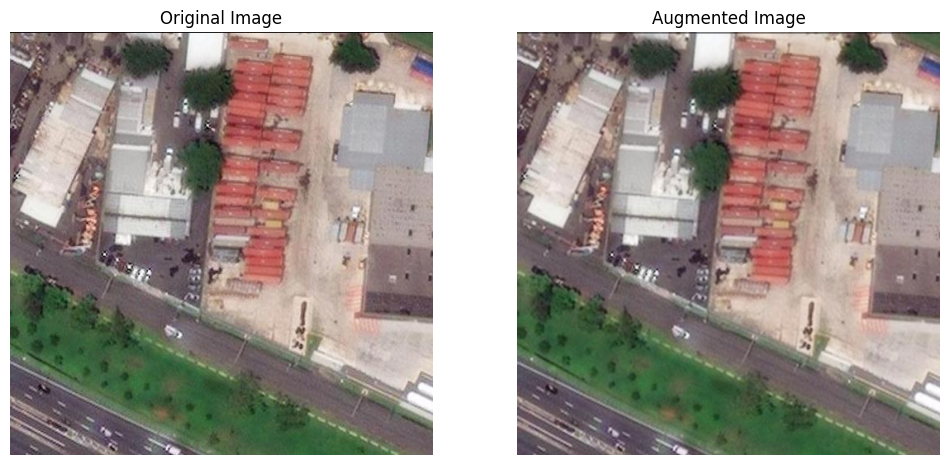

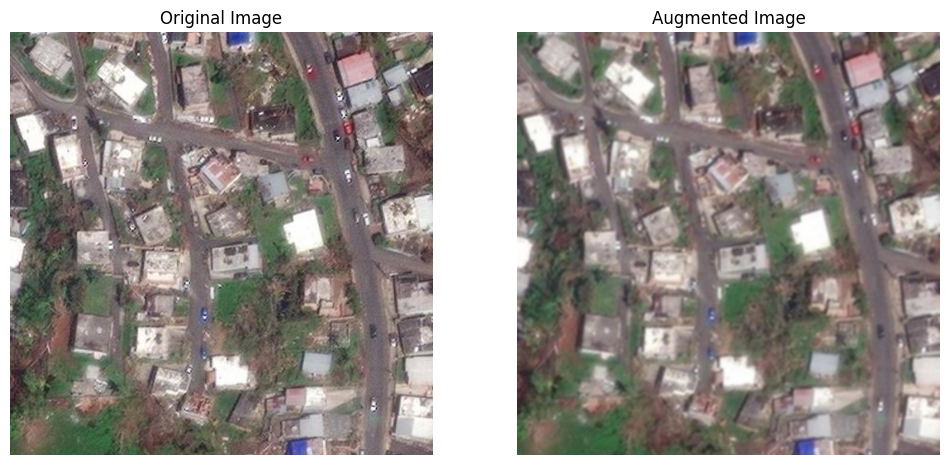

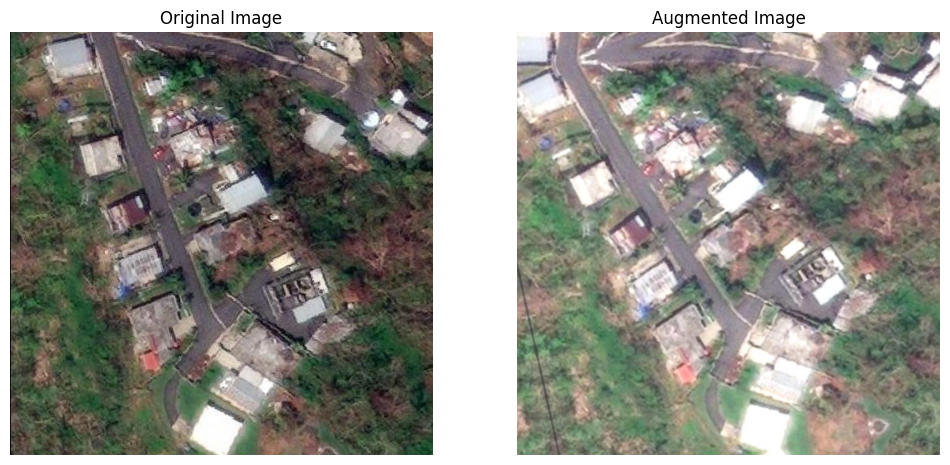

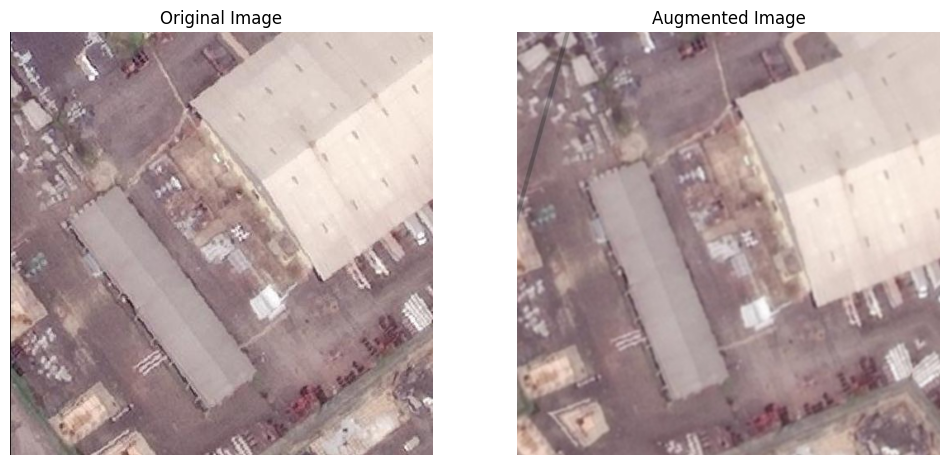

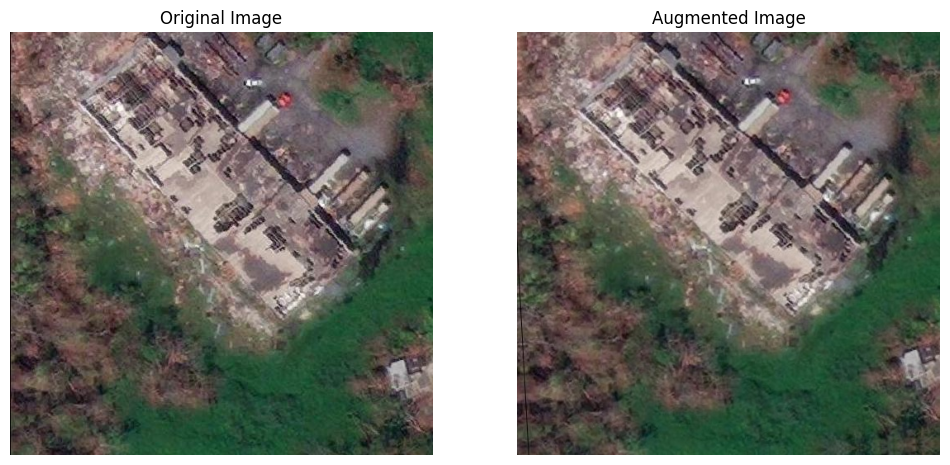

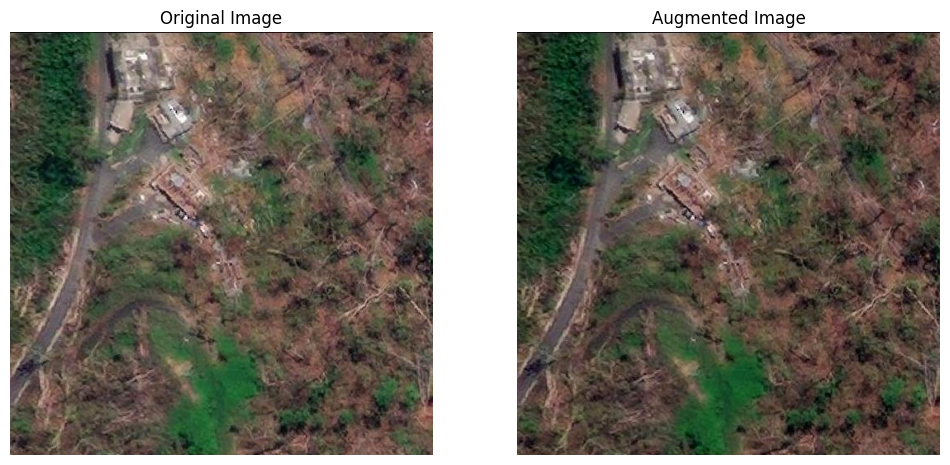

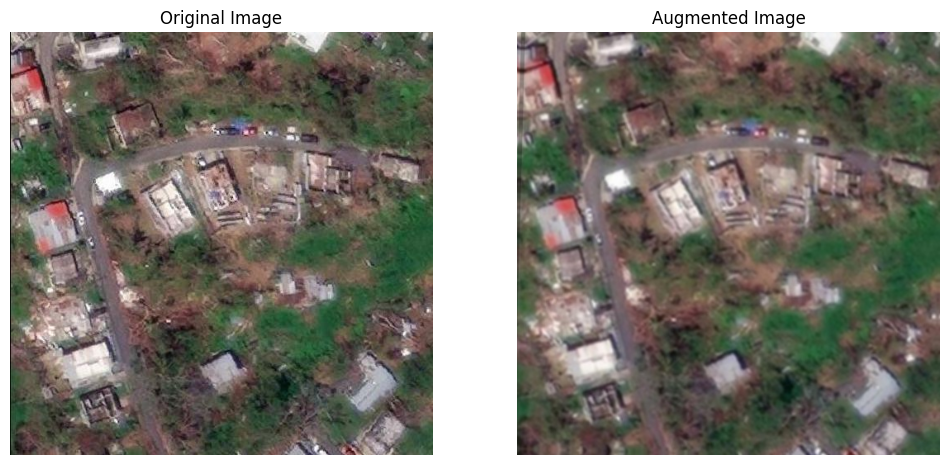

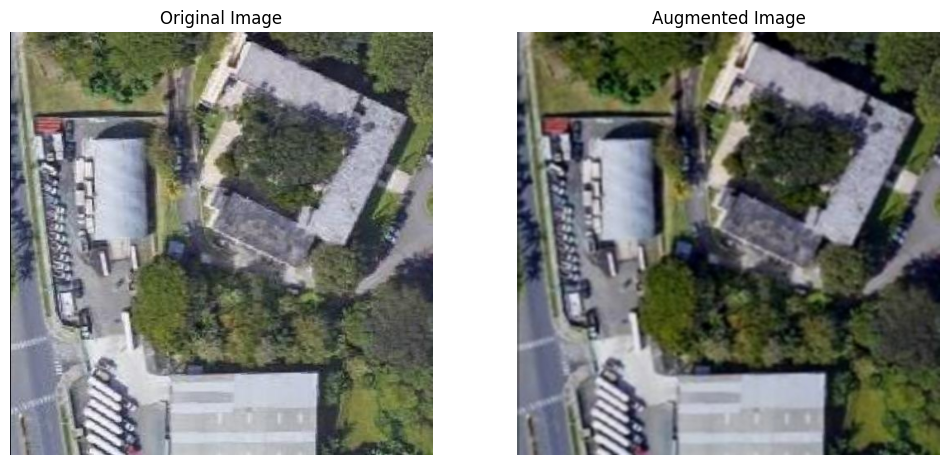

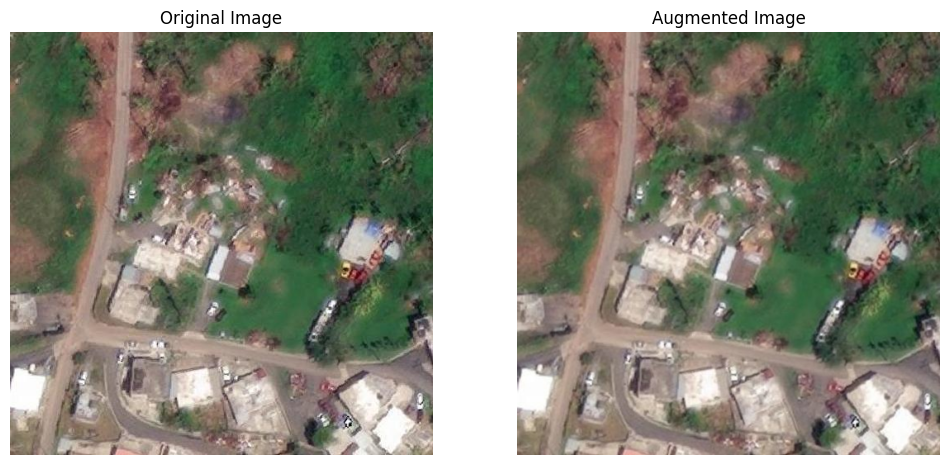

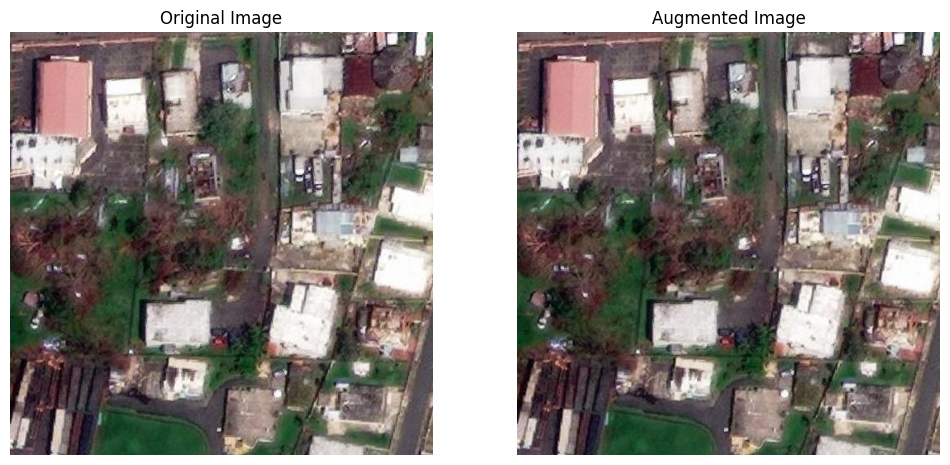

In [ ]:
import random
import matplotlib.pyplot as plt

def draw_polygons(image, polygons, class_labels):
    for polygon, label in zip(polygons, class_labels):
        draw = ImageDraw.Draw(image)
        # Convert flat list of points to tuple pairs [(x1, y1), (x2, y2), ..., (xn, yn)]
        polygon_points = [(polygon[i], polygon[i + 1]) for i in range(0, len(polygon), 2)]
        draw.polygon(polygon_points, outline="red", width=2)
        text_position = polygon_points[0]
        draw.text(text_position, str(label), fill="yellow")
    return image


def load_and_convert_annotations(annotation_path, img_width, img_height):
    polygons = []
    class_labels = []
    return polygons, class_labels


def visualize_images_and_annotations(image_dir, annotation_dir, output_dir):
    image_dir = Path(image_dir)
    annotation_dir = Path(annotation_dir)
    output_dir = Path(output_dir)

    # Get all JPEG images in the directory
    all_images = list(image_dir.glob('*.jpg'))

    selected_images = random.sample(all_images, 10)

    for image_path in selected_images:
        # Process and visualize the original image and its annotations
        annotation_path = annotation_dir / image_path.with_suffix('.txt').name
        image = Image.open(image_path)
        img_width, img_height = image.size
        polygons, class_labels = load_and_convert_annotations(annotation_path, img_width, img_height)
        original_image_drawn = draw_polygons(image.copy(), polygons, class_labels)

        # Process and visualize the augmented image and its annotations
        annotation_path = annotation_dir / image_path.with_suffix('.txt').name
        aug_image_path = output_dir / image_path.name


        # Original image and annotations
        image = Image.open(image_path)
        img_width, img_height = image.size


        # Augmented image and annotations
        aug_image = Image.open(aug_image_path)
        aug_width, aug_height = aug_image.size
        aug_polygons, aug_class_labels = load_and_convert_annotations(aug_annotation_path, aug_width, aug_height)
        aug_image_drawn = draw_polygons(aug_image.copy(), aug_polygons, aug_class_labels)

        # Display the original and augmented images side by side
        fig, ax = plt.subplots(1, 2, figsize=(12, 6))
        ax[0].imshow(original_image_drawn)
        ax[0].set_title('Original Image')
        ax[0].axis('off')

        ax[1].imshow(aug_image_drawn)
        ax[1].set_title('Augmented Image')
        ax[1].axis('off')

        plt.show()


if __name__ == "__main__":
    current_dir = Path.cwd()
    images_dir = current_dir / "given/OtherTeamData2"
    annotations_dir = images_dir
    output_dir = current_dir / "given/AugmentedData2"

    visualize_images_and_annotations(images_dir, annotations_dir, output_dir)


## **Visualizing Box Annotation**

In [ ]:
# import random
# import matplotlib.pyplot as plt


# def load_and_convert_annotations(annotation_path, img_width, img_height):
#     bboxes = []
#     class_labels = []
#     with open(annotation_path, 'r') as file:
#         for line in file:
#             class_id, x_center, y_center, bbox_width, bbox_height = map(float, line.strip().split())
#             bbox = convert_yolo_to_pascal_voc(x_center, y_center, bbox_width, bbox_height, img_width, img_height)
#             bboxes.append(bbox)
#             class_labels.append(int(class_id))
#     return bboxes, class_labels


# def draw_boxes(image, bboxes, class_labels):
#     for bbox, label in zip(bboxes, class_labels):
#         draw = ImageDraw.Draw(image)
#         draw.rectangle([bbox[0], bbox[1], bbox[2], bbox[3]], outline="red", width=2)
#         text_position = (bbox[0] + 5, bbox[1])
#         draw.text(text_position, str(label), fill="yellow", stroke_width=100)
#     return image

# def visualize_images_and_annotations(image_dir, annotation_dir, output_dir):

#     # Ensure paths are Path objects for consistency
#     image_dir = Path(image_dir)
#     annotation_dir = Path(annotation_dir)
#     output_dir = Path(output_dir)

#     # Get all JPEG images in the directory
#     all_images = list(image_dir.glob('*.jpg'))

#     # Randomly select three images
#     selected_images = random.sample(all_images, 15)

#     for image_path in selected_images:
#         # Process and visualize the original image and its annotations
#         annotation_path = annotation_dir / image_path.with_suffix('.txt').name
#         image = Image.open(image_path)
#         img_width, img_height = image.size
#         bboxes, class_labels = load_and_convert_annotations(annotation_path, img_width, img_height)
#         original_image_drawn = draw_boxes(image.copy(), bboxes, class_labels)

#         # Process and visualize the augmented image and its annotations
#         aug_image_path = output_dir / image_path.name
#         aug_annotation_path = output_dir / image_path.with_suffix('.txt').name
#         aug_img = Image.open(aug_image_path)
#         aug_width, aug_height = aug_img.size
#         aug_bboxes, class_labels = load_and_convert_annotations(aug_annotation_path, aug_width, aug_height)
#         aug_image_drawn = draw_boxes(aug_img.copy(), aug_bboxes, class_labels)

#         # Display the original and augmented images side by side
#         fig, ax = plt.subplots(1, 2, figsize=(12, 6))
#         ax[0].imshow(original_image_drawn)
#         ax[0].set_title('Original Image')
#         ax[0].axis('off')

#         ax[1].imshow(aug_image_drawn)
#         ax[1].set_title('Augmented Image')
#         ax[1].axis('off')

#         plt.show()

# if __name__ == "__main__":
#     # Define paths
#     current_dir = Path.cwd()
#     images_dir = current_dir / "given/OtherTeamData2"
#     annotations_dir = images_dir  # Assuming annotations are in the same directory
#     output_dir = current_dir / "given/AugmentedData2"

#     visualize_images_and_annotations(images_dir, annotations_dir, output_dir)

## **Script to rename files**

In [ ]:
# current_dir = Path.cwd()
# image_folder = current_dir / "given/OtherTeamData2/images"
# label_folder = current_dir / "given/OtherTeamData2/labels"

# def rename_images_and_labels(image_folder, label_folder):
#     # Get list of image files
#     image_files = [f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f)) and f.endswith('.jpg')]

#     # Rename image files and corresponding label files
#     for idx, image_file in enumerate(image_files):
#         # Rename image file
#         old_image_path = os.path.join(image_folder, image_file)
#         new_image_path = os.path.join(image_folder, f'image{idx}.jpg')
#         os.rename(old_image_path, new_image_path)

#         # Rename corresponding label file
#         old_label_path = os.path.join(label_folder, f'{os.path.splitext(image_file)[0]}.txt')
#         new_label_path = os.path.join(label_folder, f'image{idx}.txt')
#         os.rename(old_label_path, new_label_path)

# if __name__ == "__main__":

#     # Ensure the folders exist
#     if not os.path.exists(image_folder) or not os.path.exists(label_folder):
#         print("Image or label folder does not exist.")
#     else:
#         rename_images_and_labels(image_folder, label_folder)
#         print("Images and labels renamed successfully.")
